In [12]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# read dataset
df = pd.read_csv('out_hito1.csv', low_memory=False)
columns = ['region_txt', 'weaptype1_txt', 'nkill', 'nwound', 'success', 'duration', 'n_related', 'suicide']
df_cluster = df[columns]

df_cluster

,region_txt,weaptype1_txt,nkill,nwound,success,duration,n_related,suicide
0,Sub-Saharan Africa,Firearms,104.0,6.0,1,1,0,0
1,Eastern Europe,Explosives,0.0,3.0,1,1,0,0
2,Western Europe,Firearms,1.0,0.0,1,1,0,0
3,Middle East & North Africa,Explosives,0.0,0.0,1,1,0,0
4,Middle East & North Africa,Firearms,0.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...
115992,Middle East & North Africa,Explosives,0.0,0.0,1,1,0,0
115993,Sub-Saharan Africa,NaN,2.0,1.0,1,1,0,0
115994,Sub-Saharan Africa,Firearms,2.0,0.0,1,1,0,0
115995,South Asia,Explosives,0.0,1.0,1,1,0,0


In [102]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115997 entries, 0 to 115996
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   region_txt     115997 non-null  object 
 1   weaptype1_txt  107037 non-null  object 
 2   nkill          111598 non-null  float64
 3   nwound         107652 non-null  float64
 4   success        115997 non-null  int64  
 5   duration       115997 non-null  int64  
 6   n_related      115997 non-null  int64  
 7   suicide        115997 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 7.1+ MB


In [103]:
encoder = LabelEncoder()
df_cluster2 = pd.DataFrame()
for column in columns:
    df_cluster2[column] = encoder.fit_transform(df_cluster[column])

dfc = df_cluster2.astype('int64')
dfc

,region_txt,weaptype1_txt,nkill,nwound,success,duration,n_related,suicide
0,10,4,102,6,1,0,0,0
1,4,2,0,3,1,0,0,0
2,11,4,1,0,1,0,0,0
3,5,2,0,0,1,0,0,0
4,5,4,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
115992,5,2,0,0,1,0,0,0
115993,10,11,2,1,1,0,0,0
115994,10,4,2,0,1,0,0,0
115995,8,2,0,1,1,0,0,0


In [104]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115997 entries, 0 to 115996
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   region_txt     115997 non-null  int64
 1   weaptype1_txt  115997 non-null  int64
 2   nkill          115997 non-null  int64
 3   nwound         115997 non-null  int64
 4   success        115997 non-null  int64
 5   duration       115997 non-null  int64
 6   n_related      115997 non-null  int64
 7   suicide        115997 non-null  int64
dtypes: int64(8)
memory usage: 7.1 MB


<AxesSubplot:>

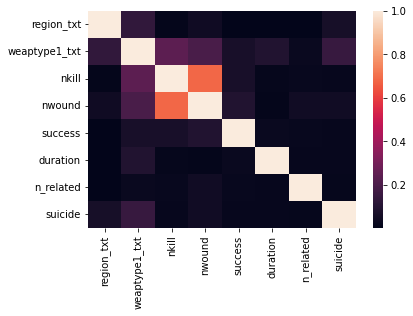

In [105]:
correlation = abs(dfc.corr())
sns.heatmap(correlation)

In [106]:
sse = []
clusters = range(1, 10+1)
for k in clusters:
    print(f'Processing k={k} clusters', flush=True)
    kmeans = KMeans(n_clusters=k).fit(dfc)
    sse.append(kmeans.inertia_)

Processing k=1 clusters
Processing k=2 clusters
Processing k=3 clusters
Processing k=4 clusters
Processing k=5 clusters
Processing k=6 clusters
Processing k=7 clusters
Processing k=8 clusters
Processing k=9 clusters
Processing k=10 clusters


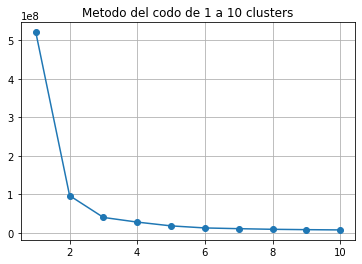

In [107]:
plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 10 clusters")
plt.grid(True)
plt.show()

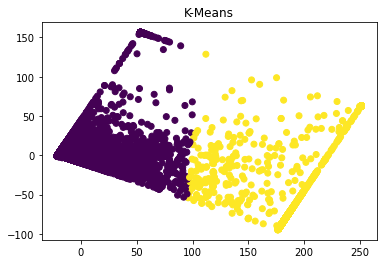

In [110]:
from sklearn.decomposition import PCA

clusters = 2
new_X = PCA(n_components=clusters, random_state=0).fit_transform(dfc)

kmeans = KMeans(n_clusters=clusters, random_state=20).fit(new_X)
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

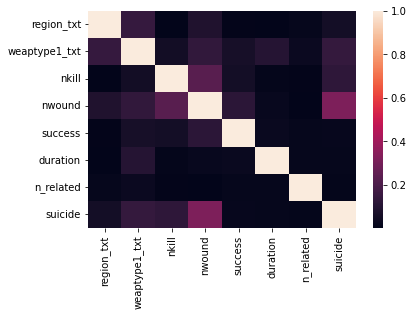

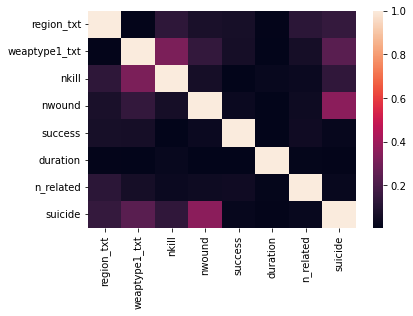

In [112]:
for k in range(clusters):
    corr = abs(dfc[kmeans.labels_ == k].corr())
    sns.heatmap(corr)
    plt.show()